In [1]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"osteoporosis.csv")
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
df.shape

(1958, 16)

In [5]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [6]:
df.isnull().sum().values.sum()

2620

In [7]:
set(df['Alcohol Consumption'])


{'Moderate', nan}

In [8]:
set(df['Medical Conditions'])


{'Hyperthyroidism', 'Rheumatoid Arthritis', nan}

In [9]:
set(df['Medications'])

{'Corticosteroids', nan}

In [10]:
'''considering that the empty values indicate absence of the medication alcohol consumption
and medical conditions replacing their values by zero indicating the patients did not possess the mentioned features.
doing this before incoding beacuse we want to preserve the absence of features. Furthermore lets convert the numerical 0 value to string so that 
we have same datatype while we encode it.''' 

'considering that the empty values indicate absence of the medication alcohol consumption\nand medical conditions replacing their values by zero indicating the patients did not possess the mentioned features.\ndoing this before incoding beacuse we want to preserve the absence of features. Furthermore lets convert the numerical 0 value to string so that \nwe have same datatype while we encode it.'

In [11]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna(0)

In [12]:
df['Medical Conditions'] = df['Medical Conditions'].fillna(0)

In [13]:
df['Medications'] = df['Medications'].fillna(0)

In [14]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype(str)


In [15]:
df['Medical Conditions'] = df['Medical Conditions'].astype(str)

In [16]:
df['Medications'] = df['Medications'].astype(str)

In [17]:
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [18]:
set(df['Physical Activity'])

{'Active', 'Sedentary'}

In [19]:
set(df['Alcohol Consumption'])

{'0', 'Moderate'}

In [20]:
set(df['Hormonal Changes'])

{'Normal', 'Postmenopausal'}

In [21]:
set(df['Race/Ethnicity'])

{'African American', 'Asian', 'Caucasian'}

In [22]:
set(df['Prior Fractures'])

{'No', 'Yes'}

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

df['Gender'] = ord_enc.fit_transform(df[['Gender']]).astype('int')
df['Hormonal Changes'] = ord_enc.fit_transform(df[['Hormonal Changes']]).astype('int')
df['Family History'] = ord_enc.fit_transform(df[['Family History']]).astype('int')
df['Race/Ethnicity'] = ord_enc.fit_transform(df[['Race/Ethnicity']]).astype('int')
df['Body Weight'] = ord_enc.fit_transform(df[['Body Weight']]).astype('int')
df['Calcium Intake'] = ord_enc.fit_transform(df[['Calcium Intake']]).astype('int')
df['Vitamin D Intake'] = ord_enc.fit_transform(df[['Vitamin D Intake']]).astype('int')
df['Physical Activity'] = ord_enc.fit_transform(df[['Physical Activity']]).astype('int')
df['Smoking'] = ord_enc.fit_transform(df[['Smoking']]).astype('int')
df['Alcohol Consumption'] = ord_enc.fit_transform(df[['Alcohol Consumption']]).astype('int')
df['Medical Conditions'] = ord_enc.fit_transform(df[['Medical Conditions']]).astype('int')
df['Medications'] = ord_enc.fit_transform(df[['Medications']]).astype('int')
df['Prior Fractures'] = ord_enc.fit_transform(df[['Prior Fractures']]).astype('int')

In [24]:
set(df['Medical Conditions'])

{0, 1, 2}

In [25]:
df1=df[['Gender','Age','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Smoking','Alcohol Consumption','Medical Conditions','Medications','Prior Fractures','Osteoporosis']]

In [26]:
correlation=df1.corr()
print(correlation)

                       Gender       Age  Hormonal Changes  Family History  \
Gender               1.000000  0.015105         -0.018361        0.019671   
Age                  0.015105  1.000000          0.005464       -0.016848   
Hormonal Changes    -0.018361  0.005464          1.000000        0.020393   
Family History       0.019671 -0.016848          0.020393        1.000000   
Race/Ethnicity       0.015803 -0.029398         -0.034173        0.015095   
Body Weight          0.010880  0.017046         -0.007259        0.003139   
Calcium Intake      -0.009536  0.002128         -0.016296        0.024001   
Vitamin D Intake     0.022052  0.019184         -0.000955       -0.009587   
Physical Activity    0.027155  0.020651         -0.019513       -0.023330   
Smoking             -0.039881  0.027591         -0.006122       -0.013222   
Alcohol Consumption -0.015202  0.004541         -0.006148        0.002887   
Medical Conditions   0.001381  0.025280         -0.017705        0.022574   

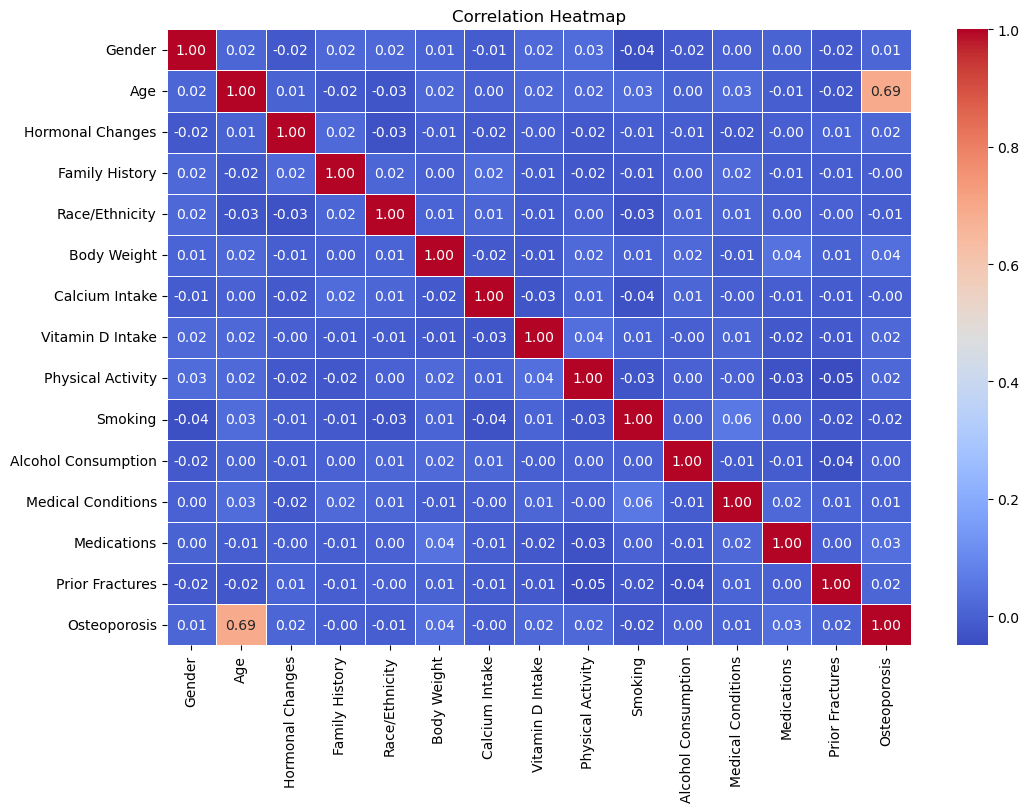

In [27]:

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [28]:
'''the value for family history, calcium intake  and alcohol consumption are -0.0 which only signifies that there is no 'linear'
relationship but there could be non-linear relationship
but still we don't exclude them because they play a significant role for the occurance of the disease.
it's always good to seek knowledge of the domain and not just depend on the relationship.'''

"the value for family history, calcium intake  and alcohol consumption are -0.0 which only signifies that there is no 'linear'\nrelationship but there could be non-linear relationship\nbut still we don't exclude them because they play a significant role for the occurance of the disease.\nit's always good to seek knowledge of the domain and not just depend on the relationship."

In [29]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df1, train_size = 0.85, test_size = 0.15, random_state = 1)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train = df_train[['Gender','Age','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Smoking','Alcohol Consumption','Medical Conditions','Medications','Prior Fractures']]
y_train=df_train[['Osteoporosis']]
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
print("Linear regression train accuracy = ",round(lr_model.score(X_train, y_train)*100))



Linear regression train accuracy =  49


In [31]:
#test accuracy
test_data = df_test
y_test = test_data['Osteoporosis']
X_test = test_data.drop(['Osteoporosis'],axis = 1)
print("Linear regression test accuracy = ",round(lr_model.score(X_test, y_test)*100))


Linear regression test accuracy =  44


In [32]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train, y_train)
print("Logistic regression train accuracy= ",lg_model.score(X_train, y_train)*100)
print("Logistic regression test accuracy = ",lg_model.score(X_test, y_test)*100)

Logistic regression train accuracy=  82.6923076923077
Logistic regression test accuracy =  79.59183673469387


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='linear')

# Define the parameter grid for C
param_grid = {'C': [0.1, 0.4, 0.6, 0.9, 1.1, 1.4, 1.6, 1.9, 2.2, 2.4, 2.7, 2.9, 3.2, 3.5, 3.7, 4.0, 4.2, 4.5, 4.7, 5.0]}


# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter and best model
print("Best parameter (C):", grid_search.best_params_)
print("Best accuracy on training set:", grid_search.best_score_)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best parameter (C): {'C': 0.9}
Best accuracy on training set: 0.8359528202901696


SVC(C=0.9, kernel='linear')

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
Y_pred = nb_model.predict(X_test)

test_data = df_test
y_test = test_data['Osteoporosis']
X_test = test_data.drop(['Osteoporosis'],axis = 1)

# Evaluate the model (on test set)
Y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report fortest
print("\nTest Classification Report:")
print(classification_report(y_test, Y_test_pred))

Test Accuracy: 0.7483

Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       151
           1       0.79      0.66      0.72       143

    accuracy                           0.75       294
   macro avg       0.75      0.75      0.75       294
weighted avg       0.75      0.75      0.75       294



In [35]:
# Define Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf.fit(X_train, y_train)
test_data = df_test
y_test = test_data['Osteoporosis']
X_test = test_data.drop(['Osteoporosis'],axis = 1)
# Evaluate model accuracy
accuracy = rf.score(X_test, y_test)
print(f"Model Accuracy for random forest: {accuracy:.4f}")

Model Accuracy for random forest: 0.8265


In [38]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Prepare test data
test_data = df_test
y_test = test_data['Osteoporosis']
X_test = test_data.drop(['Osteoporosis'], axis=1)

# Make predictions using the trained model
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy for XGBoost: {accuracy:.4f}")


Model Accuracy for XGBoost: 0.8605


In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Set up the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Use GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the XGBoost model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy for tuned XGBoost: {accuracy:.4f}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Model Accuracy for tuned XGBoost: 0.9048


In [43]:
import pickle as pk
filename = r'C:\Users\Asus\Desktop\broad-way\XGBoost.pickle'
pk.dump(best_xgb_model, open(filename, 'wb'))